In [1]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Problem 3. Derivatives of Exponential Functions
Plot the derivative of $y = 2^x$.

In [6]:
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    # I am not using formward precision like this: (function(point + precision) - function(point))/precision 
    # because I'm trying to minimise floating-point errors with precision - which can be seen in the plot when I display f'(x[-1])
    return (function(point + precision) - function(point - precision)) / (2 * precision)
    

def plot_derivative(function, derivative = None, min_x = -10, max_x = 10, title=None):
    """
    Plots the function and its derivative. 
    The `derivative` parameter is optional and can be provided as a separate function.
    If it's not provided, the derivative will be calculated automatically
    """
    # We're using vectorized functions to make our code simpler: this only hides the for-loop,
    # it doesn't provide any performance gain
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = function(x)
    
    dy = []
    if derivative is None:
        dy = np.vectorize(calculate_derivative_at_point)(function, x)
    else:
        dy = np.vectorize(derivative)(x)
    
    plt.plot(x, y, color = "blue", label="f(x)")
    plt.plot(x, dy, color="green", label="f'(x)")
    plt.axvline(x[-1], color="grey", ls="dotted")
    plt.axhline(dy[-1], color="grey", ls="dashed", label=f"f'({x[-1]})={np.format_float_scientific(dy[-1], unique=True, trim='k')}")
    plt.axhline(function(x[-1]), color="grey", ls="dashdot", label=f"f({x[-1]})={np.format_float_scientific(function(x[-1]), unique=True, trim='k')}")
    plt.gca().legend()
    plt.xlabel("x-axis")
    plt.ylabel("f(x), f′(x)")
    plt.show()

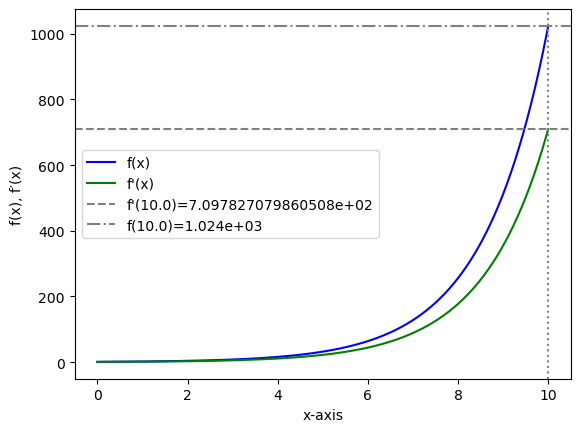

In [7]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 10)

The function and its derivative look closely related, only the derivative seems to grow a bit slower than the function. Let's confirm that by looking at a broader range:

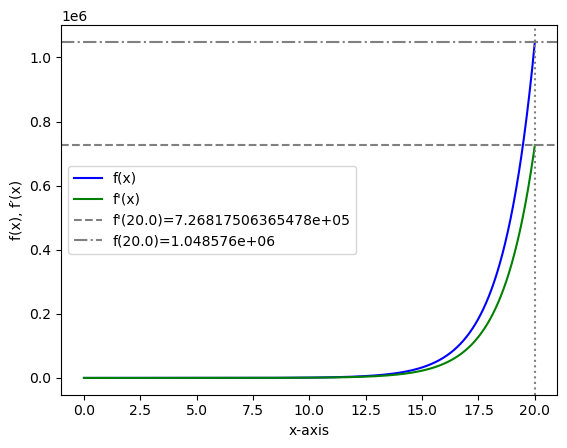

In [8]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 20)

The same pattern will continue if we try to plot any exponential function, e.g. $y = 3^x$, $y = 4^x$ and so on, if the base of the exponent is greater than 1. If we want to plot, say, $y = 0,5^x$, we'll get a slightly different result. Note that the functions look more or less the same, only their signs are flipped.

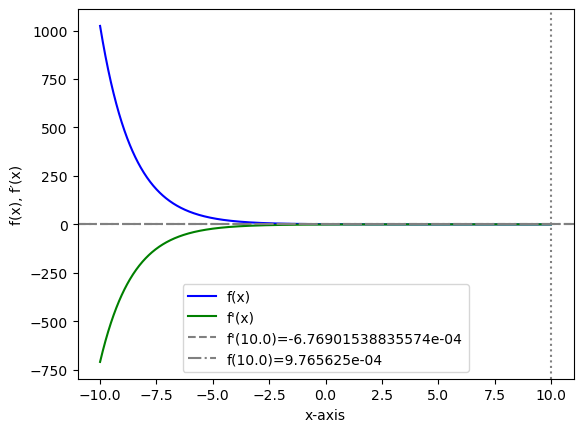

In [9]:
plot_derivative(lambda x: 0.5 ** x)

Very interesting things happen if we plot $y = e^x$:

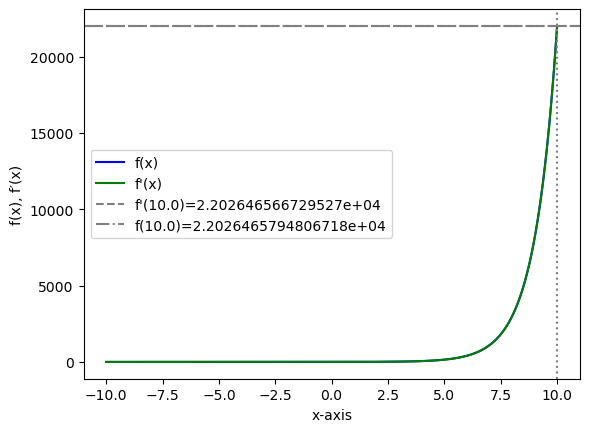

In [10]:
plot_derivative(np.exp)

The plots overlap. You can see that this is true if you plot the function and its derivative with different line widths. This means that

$$ (e^x)' = e^x $$

Also:
$$ (e^x)'' = e^x $$
$$ (e^x)''' = e^x $$
... and so on. This is the only function whose rate of change (derivative) is equal to the function itself. This property makes it even more interesting for science and math.

Also, do you remember that $e^{i\varphi} = \cos(\varphi) + i\sin(\varphi)$? This constant never ceases to amaze.

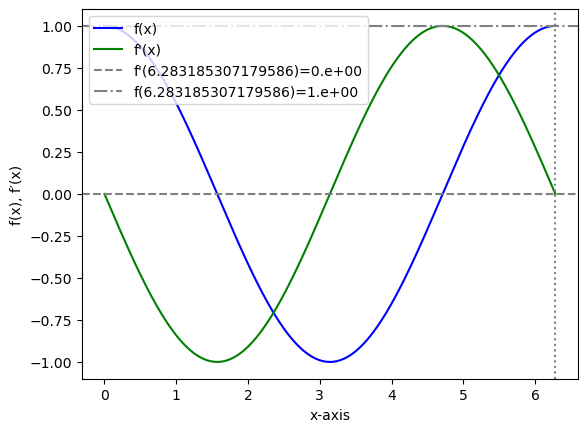

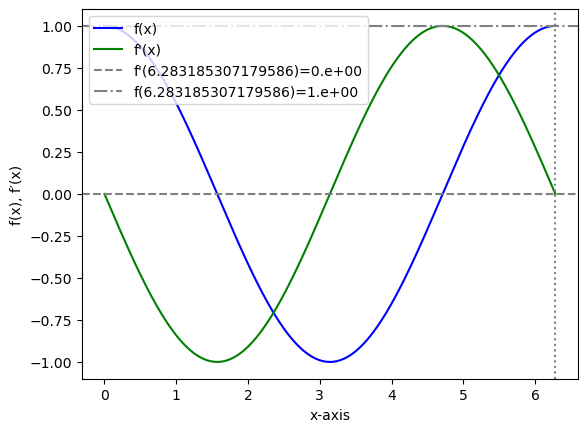

In [22]:
plot_derivative(lambda x: np.cos(x) + 1j * np.sin(x), min_x = 0, max_x = 2*math.pi)
plot_derivative(lambda x: np.exp(1j*x), min_x = 0, max_x = 2*math.pi)

We plotted both functions $e^{i\varphi}$ and & \cos(\varphi) + i\sin(\varphi)$